<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/7_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.6 : Convulational Neural Networks (LeNet)

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
a = nn.LazyConv2d(1, kernel_size=3)
a

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


LazyConv2d(0, 1, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
type(a)

torch.nn.modules.conv.LazyConv2d

In [ ]:
type(a) == nn.LazyConv2d

True

In [ ]:
nn.init.xavier_uniform_??

In [ ]:
a = torch.zeros(3, 3)
b = nn.init.xavier_uniform_(a)
print(f"a = {a}")
print(f"b = {b}")

a = tensor([[ 5.2262e-01,  1.7073e-01,  2.4705e-01],
        [-7.6995e-01,  5.6661e-01, -2.3159e-01],
        [-1.3444e-01, -9.4903e-04, -9.7841e-01]])
b = tensor([[ 5.2262e-01,  1.7073e-01,  2.4705e-01],
        [-7.6995e-01,  5.6661e-01, -2.3159e-01],
        [-1.3444e-01, -9.4903e-04, -9.7841e-01]])


In [ ]:
b.mean()

tensor(-0.0676)

In [ ]:
b.std()

tensor(0.5321)

In [ ]:
def add_to_class(Class):
  def wrapper(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper

In [ ]:
def init_cnn(module):
  # initialize the weights for the CNN
  if type(module) == nn.Linear or type(module) == nn.LazyConv2d:
    nn.init.xavier_uniform_(module.weight)

In [ ]:
class LeNet(d2l.Classifier):

  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.lr = lr
    self.num_classes = num_classes
    self.net = nn.Sequential(nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
                             nn.AvgPool2d(kernel_size=2, stride=2),
                             nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
                             nn.AvgPool2d(kernel_size=2, stride=2),
                             nn.Flatten(),
                             nn.LazyLinear(128), nn.Sigmoid(),
                             nn.LazyLinear(84), nn.Sigmoid(),
                             nn.LazyLinear(num_classes))
    
  def layer_summery(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
      X = layer(X)
      print(layer.__class__.__name__, 'output shape:\t', X.shape)
  

In [ ]:
model = LeNet()
model.layer_summery((1, 1, 28, 28)) # gray scale image of 28 x 28 pixels

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 128])
Sigmoid output shape:	 torch.Size([1, 128])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
model.apply_init??

In [ ]:
def fun(shape):
  return torch.randn(*shape)

In [ ]:
a = fun((3, 4, 5, 6))
print(a.shape)

torch.Size([3, 4, 5, 6])


In [ ]:
class Person():

  def __init__(self, name, age):
    self.name = name
    self.age = age

  def tell_age(self):
    print(f"I am {age} years old!")

In [ ]:
i = Person("arnav", 19)
print(i.__class__)
print(i.__class__.__name__) # gives the exact name of the class as described by me
print(i)

<class '__main__.Person'>
Person


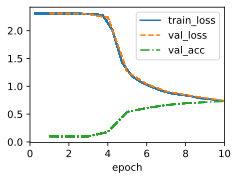

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet()
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)

# Trying to implement from scratch:

In [1]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np

In [2]:
# hyper parameters : 
num_epochs = 10
batch_size = 4
learning_rate = 0.1

with learning rate = 0.01 the model is performing much better

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [ ]:
torchvision.datasets.FashionMNIST??

In [4]:
# first let's prep the data
train_set = torchvision.datasets.FashionMNIST(root='./data',
                                              train=True,
                                              transform=transform,
                                              download=True)

test_set = torchvision.datasets.FashionMNIST(root='./data',
                                             train=False,
                                             transform=transform,
                                             download=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
train_set.data.shape # so we are working with gray scale images

torch.Size([60000, 28, 28])

In [ ]:
torch.utils.data.DataLoader??

In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           shuffle=True,
                                           batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                           shuffle=True,
                                           batch_size=batch_size)

In [ ]:
examples = next(iter(train_loader))
features, targets = examples
print(f"features.shape = {features.shape}")
print(f"targets.shape = {targets.shape}")

features.shape = torch.Size([4, 1, 28, 28])
targets.shape = torch.Size([4])


In [6]:
classes = train_set.classes
print(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
class LeNet(nn.Module):

  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.Sigmoid(),
        nn.LazyLinear(84), nn.Sigmoid(),
        nn.LazyLinear(10)
        )
  
  def forward(self, X):
    return self.net(X)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
model = LeNet().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [8]:
n_total_steps = len(train_loader)
print(n_total_steps)

15000


In [ ]:
nn.CrossEntropyLoss??

In [ ]:
# training loop : 
for epoch in range(num_epochs):
  for i, (features, targets) in enumerate(train_loader):

    features = features.to(device)
    targets = targets.to(device)

    # forward pass : outputs and loss
    outputs = model(features)
    loss = criterion(outputs, targets)

    # backward pass : gradient
    optimizer.zero_grad()
    loss.backward()

    # update the params
    optimizer.step()

    if (epoch+1)%(num_epochs/10) == 0:
      if (i+1)%(5000) == 0:
        print(f"epoch : {epoch+1}/{num_epochs}, step : {i+1}/{n_total_steps}, loss : {loss.item():.4f}")

print("Finished Training : Model ready to make some predictions")

epoch : 1/10, step : 5000/15000, loss : 2.3337
epoch : 1/10, step : 10000/15000, loss : 2.1240
epoch : 1/10, step : 15000/15000, loss : 1.0018
epoch : 2/10, step : 5000/15000, loss : 0.5593
epoch : 2/10, step : 10000/15000, loss : 0.1212
epoch : 2/10, step : 15000/15000, loss : 0.5674
epoch : 3/10, step : 5000/15000, loss : 0.1882
epoch : 3/10, step : 10000/15000, loss : 0.2225
epoch : 3/10, step : 15000/15000, loss : 0.6081
epoch : 4/10, step : 5000/15000, loss : 0.1917
epoch : 4/10, step : 10000/15000, loss : 0.0202
epoch : 4/10, step : 15000/15000, loss : 0.1473
epoch : 5/10, step : 5000/15000, loss : 0.1426
epoch : 5/10, step : 10000/15000, loss : 0.5885
epoch : 5/10, step : 15000/15000, loss : 0.1538
epoch : 6/10, step : 5000/15000, loss : 0.4544
epoch : 6/10, step : 10000/15000, loss : 0.4084
epoch : 6/10, step : 15000/15000, loss : 0.2764
epoch : 7/10, step : 5000/15000, loss : 0.1393
epoch : 7/10, step : 10000/15000, loss : 0.0655
epoch : 7/10, step : 15000/15000, loss : 0.0255

In [ ]:
# Evaluation : 
with torch.no_grad():
  n_samples = 0
  n_correct = 0
  for features, targets in test_loader:
    features = features.to(device)
    targets = targets.to(device)
    outputs = model(features)
    _, preds = torch.max(outputs, 1)
    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()

  acc = 100 * n_correct / n_samples
  print(f"accuracy = {acc:.4f}")

accuracy = 88.4100


Now we talkin😁

## Ex 7.6:

### Q1:

In [ ]:
class LeNet2(nn.Module):

  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
        nn.Flatten(),
        nn.LazyLinear(128), nn.Sigmoid(),
        nn.LazyLinear(84), nn.Sigmoid(),
        nn.LazyLinear(10)
    )

  def forward(self, X):
    return self.net(X)

In [ ]:
model = LeNet2().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# training loop 
for epoch in range(num_epochs):
  for i, (features, targets) in enumerate(train_loader):

    features = features.to(device)
    targets = targets.to(device)

    outputs = model(features)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%(num_epochs/10) == 0 and (i+1)%5000 == 0:
      print(f"epoch : {epoch+1}/{num_epochs}, step : {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

epoch : 1/10, step : 5000/15000, loss = 2.3739
epoch : 1/10, step : 10000/15000, loss = 2.3550
epoch : 1/10, step : 15000/15000, loss = 2.2961
epoch : 2/10, step : 5000/15000, loss = 2.3348
epoch : 2/10, step : 10000/15000, loss = 2.3118
epoch : 2/10, step : 15000/15000, loss = 2.3394
epoch : 3/10, step : 5000/15000, loss = 2.2887
epoch : 3/10, step : 10000/15000, loss = 2.1148
epoch : 3/10, step : 15000/15000, loss = 1.1959
epoch : 4/10, step : 5000/15000, loss = 0.3822
epoch : 4/10, step : 10000/15000, loss = 1.2721
epoch : 4/10, step : 15000/15000, loss = 1.6279
epoch : 5/10, step : 5000/15000, loss = 1.3431
epoch : 5/10, step : 10000/15000, loss = 1.2473
epoch : 5/10, step : 15000/15000, loss = 0.0745
epoch : 6/10, step : 5000/15000, loss = 0.6763
epoch : 6/10, step : 10000/15000, loss = 0.0047
epoch : 6/10, step : 15000/15000, loss = 0.3881
epoch : 7/10, step : 5000/15000, loss = 0.0197
epoch : 7/10, step : 10000/15000, loss = 0.1628
epoch : 7/10, step : 15000/15000, loss = 0.6288

In [ ]:
# Evaluation : 
with torch.no_grad():
  n_samples = 0
  n_correct = 0
  for features, targets in test_loader:
    features = features.to(device)
    targets = targets.to(device)
    outputs = model(features)
    _, preds = torch.max(outputs, 1)
    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()

  acc = 100 * n_correct / n_samples
  print(f"accuracy = {acc:.4f}")

accuracy = 89.6200


Now Let's replacem the Sigmoid function with relu:

In [ ]:
nn.ReLU??

In [ ]:
class LeNet3(nn.Module):

  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, stride=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(10)
    )

  def forward(self, X):
    return self.net(X)

In [ ]:
model = LeNet3().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# training loop 
for epoch in range(num_epochs):
  for i, (features, targets) in enumerate(train_loader):

    features = features.to(device)
    targets = targets.to(device)

    outputs = model(features)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%(num_epochs/10) == 0 and (i+1)%5000 == 0:
      print(f"epoch : {epoch+1}/{num_epochs}, step : {i+1}/{n_total_steps}, loss = {loss.item():.4f}")

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


epoch : 1/10, step : 5000/15000, loss = 0.8801
epoch : 1/10, step : 10000/15000, loss = 0.1162
epoch : 1/10, step : 15000/15000, loss = 0.0113
epoch : 2/10, step : 5000/15000, loss = 0.4454
epoch : 2/10, step : 10000/15000, loss = 0.8948
epoch : 2/10, step : 15000/15000, loss = 0.4283
epoch : 3/10, step : 5000/15000, loss = 0.7044
epoch : 3/10, step : 10000/15000, loss = 0.3037
epoch : 3/10, step : 15000/15000, loss = 0.0566
epoch : 4/10, step : 5000/15000, loss = 0.1120
epoch : 4/10, step : 10000/15000, loss = 0.6526
epoch : 4/10, step : 15000/15000, loss = 0.0633
epoch : 5/10, step : 5000/15000, loss = 0.0362
epoch : 5/10, step : 10000/15000, loss = 0.4658
epoch : 5/10, step : 15000/15000, loss = 0.2909
epoch : 6/10, step : 5000/15000, loss = 0.3437
epoch : 6/10, step : 10000/15000, loss = 0.6214
epoch : 6/10, step : 15000/15000, loss = 0.9698
epoch : 7/10, step : 5000/15000, loss = 1.4871
epoch : 7/10, step : 10000/15000, loss = 0.1691
epoch : 7/10, step : 15000/15000, loss = 0.0255

In [ ]:
# Evaluation : 
with torch.no_grad():
  n_samples = 0
  n_correct = 0
  for features, targets in test_loader:
    features = features.to(device)
    targets = targets.to(device)
    outputs = model(features)
    _, preds = torch.max(outputs, 1)
    n_samples += targets.shape[0]
    n_correct += (preds == targets).sum().item()

  acc = 100 * n_correct / n_samples
  print(f"accuracy = {acc:.4f}")

accuracy = 87.0300


### Q2: 

learning rate = 0.01 is much better

num_epochs = 10

batch_size = 4

accuracy socres : changing the size of convulation window

when we are increasing the kernel_size for the convulation window we are decreasing the number of input features for the fully connected layers : so the model might becomes less expressive at a certain stage

- kernel_size = 3 : 89.92%
- kernel_size = 5 : 87.03%
- kernel_size = 7 : 89.62%
- kernel_size = 9 : 88.76%
- kernel_size = 11 : 87.58%

so we'll be using kernel_size = 5

Now let's play with the outputs channels and find an optimum value:

- (3, 16) : 89.75%
- (4, 16) : 88.99%
- (5, 16) : 90.67%
- (6, 16) : 89.62%
- (7, 16) : 90.30%
- (8, 16) : 90.13%
- (9, 16) : 90.50%
- (10, 16) : 90.59%
- (11, 16) : 91.20%
- (12, 16) : 90.55%
- (13, 16) : 90.48%

all the inputs are giving almost the same accuracy

using 3 convulational layers :

- 3fc : acc = 89.37%
- 4fc : acc = 88.61%

with xavier initialization : acc = 89.54%

In [9]:
def acc_model(model, loader):

  with torch.no_grad():
    n_samples = 0
    n_correct = 0
    for features, targets in loader:
      features = features.to(device)
      targets = targets.to(device)

      outputs = model(features)
      _, preds = torch.max(outputs, 1)
      n_samples += targets.shape[0]
      n_correct += (preds == targets).sum().item()

  acc = 100 * n_correct / n_samples
  print(f"accuracy of model : {acc:.4f}")
  return acc

In [13]:
class Trainer():

  def __init__(self, num_epochs, lr):
    self.num_epochs = num_epochs
    self.lr = lr

  def fit(self, model, loader):

    optimizer = torch.optim.SGD(model.parameters(), self.lr)
    criterion = nn.CrossEntropyLoss()
    n_total_steps = len(loader)

    # training loop : 
    for epoch in range(self.num_epochs):
      for i, (features, targets) in enumerate(loader):

        features = features.to(device)
        targets = targets.to(device)

        outputs = model(features)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % (num_epochs/10) == 0 and (i+1)%(n_total_steps/3) == 0:
          print(f"epoch : {epoch+1}/{self.num_epochs}, step : {i+1}/{n_total_steps}, loss : {loss.item():.4f}")

In [ ]:
class LeNet4(nn.Module):

  def __init__(self, output_channel_1):
    super().__init__()
    self.net = nn.Sequential(
        nn.LazyConv2d(output_channel_1, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=3), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(10)
    )

  def forward(self, X):
    return self.net(X)

In [ ]:
model = LeNet4().to(device)
trainer = Trainer(num_epochs=num_epochs, lr=0.01)
trainer.fit(model, train_loader)
acc_model(model, test_loader)

epoch : 1/10, step : 5000/15000, loss : 0.5401
epoch : 1/10, step : 10000/15000, loss : 0.1995
epoch : 1/10, step : 15000/15000, loss : 0.4662
epoch : 2/10, step : 5000/15000, loss : 0.0064
epoch : 2/10, step : 10000/15000, loss : 0.5162
epoch : 2/10, step : 15000/15000, loss : 0.1391
epoch : 3/10, step : 5000/15000, loss : 0.2293
epoch : 3/10, step : 10000/15000, loss : 0.1788
epoch : 3/10, step : 15000/15000, loss : 0.0304
epoch : 4/10, step : 5000/15000, loss : 0.9400
epoch : 4/10, step : 10000/15000, loss : 0.0368
epoch : 4/10, step : 15000/15000, loss : 0.0908
epoch : 5/10, step : 5000/15000, loss : 0.4565
epoch : 5/10, step : 10000/15000, loss : 0.0281
epoch : 5/10, step : 15000/15000, loss : 0.2657
epoch : 6/10, step : 5000/15000, loss : 0.0122
epoch : 6/10, step : 10000/15000, loss : 0.1342
epoch : 6/10, step : 15000/15000, loss : 0.4669
epoch : 7/10, step : 5000/15000, loss : 0.0366
epoch : 7/10, step : 10000/15000, loss : 0.0158
epoch : 7/10, step : 15000/15000, loss : 0.0088

In [ ]:
output_channels_1 = [3, 4, 5, 7, 8, 9, 10, 11]
acc_list = []

for output_channel in output_channels_1:
  model = LeNet4(output_channel).to(device)
  trainer = Trainer(num_epochs=num_epochs, lr=0.01)
  trainer.fit(model, train_loader)
  acc_list.append(acc_model(model, test_loader))

accuracy of model : 89.7500
accuracy of model : 88.9900
accuracy of model : 90.6700
accuracy of model : 90.3000
accuracy of model : 90.1300
accuracy of model : 90.5000
accuracy of model : 90.5900
accuracy of model : 91.2000


In [40]:
model = LeNet4(13).to(device)
trainer = Trainer(num_epochs=num_epochs, lr=0.01)
trainer.fit(model, train_loader)
acc_model(model, test_loader)

accuracy of model : 90.4800


90.48

Now let's try 3 convulational layers

In [15]:
class LeNet(nn.Module):

  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(12, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=2, padding=0), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2), 
        nn.Flatten(),
        nn.LazyLinear(120), nn.ReLU(),
        nn.LazyLinear(84), nn.ReLU(),
        nn.LazyLinear(32), nn.ReLU(),
        nn.LazyLinear(10)
    )

  def forward(self, X):
    return self.net(X)

In [16]:
model = LeNet().to(device)
trainer = Trainer(num_epochs=num_epochs, lr=0.01)
trainer.fit(model, train_loader)
acc_model(model, test_loader)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


epoch : 1/10, step : 5000/15000, loss : 1.8439
epoch : 1/10, step : 10000/15000, loss : 0.2056
epoch : 1/10, step : 15000/15000, loss : 0.5839
epoch : 2/10, step : 5000/15000, loss : 0.4415
epoch : 2/10, step : 10000/15000, loss : 0.2587
epoch : 2/10, step : 15000/15000, loss : 0.4156
epoch : 3/10, step : 5000/15000, loss : 0.4243
epoch : 3/10, step : 10000/15000, loss : 0.0862
epoch : 3/10, step : 15000/15000, loss : 0.4854
epoch : 4/10, step : 5000/15000, loss : 0.3905
epoch : 4/10, step : 10000/15000, loss : 0.0047
epoch : 4/10, step : 15000/15000, loss : 1.7692
epoch : 5/10, step : 5000/15000, loss : 0.8076
epoch : 5/10, step : 10000/15000, loss : 0.4982
epoch : 5/10, step : 15000/15000, loss : 0.4753
epoch : 6/10, step : 5000/15000, loss : 0.1741
epoch : 6/10, step : 10000/15000, loss : 0.1533
epoch : 6/10, step : 15000/15000, loss : 0.0394
epoch : 7/10, step : 5000/15000, loss : 0.0426
epoch : 7/10, step : 10000/15000, loss : 0.3827
epoch : 7/10, step : 15000/15000, loss : 0.9798

88.61

let's try with xavier initialialization : 

In [18]:
class LeNet_init(nn.Module):

  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.Linear(16*5*5, 120), nn.ReLU(),
        nn.Linear(120, 84), nn.ReLU(),
        nn.Linear(84, 10)
    )
    
    for module in self.net:
      if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

  def forward(self, X):
    return self.net(X)

In [19]:
model = LeNet().to(device)
trainer = Trainer(num_epochs=num_epochs, lr=0.01)
trainer.fit(model, train_loader)
acc_model(model, test_loader)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


epoch : 1/10, step : 5000/15000, loss : 1.6483
epoch : 1/10, step : 10000/15000, loss : 0.5932
epoch : 1/10, step : 15000/15000, loss : 0.0179
epoch : 2/10, step : 5000/15000, loss : 0.4207
epoch : 2/10, step : 10000/15000, loss : 0.0886
epoch : 2/10, step : 15000/15000, loss : 0.3072
epoch : 3/10, step : 5000/15000, loss : 0.3495
epoch : 3/10, step : 10000/15000, loss : 0.7671
epoch : 3/10, step : 15000/15000, loss : 0.1619
epoch : 4/10, step : 5000/15000, loss : 0.0870
epoch : 4/10, step : 10000/15000, loss : 0.3366
epoch : 4/10, step : 15000/15000, loss : 0.4819
epoch : 5/10, step : 5000/15000, loss : 0.5640
epoch : 5/10, step : 10000/15000, loss : 0.0324
epoch : 5/10, step : 15000/15000, loss : 0.1429
epoch : 6/10, step : 5000/15000, loss : 0.1415
epoch : 6/10, step : 10000/15000, loss : 0.3041
epoch : 6/10, step : 15000/15000, loss : 0.2900
epoch : 7/10, step : 5000/15000, loss : 0.2418
epoch : 7/10, step : 10000/15000, loss : 0.0011
epoch : 7/10, step : 15000/15000, loss : 0.2570

89.54

### Q4:

In [27]:
import matplotlib.pyplot as plt

In [34]:
first_layer_activation = model.net[0:3]
examples = next(iter(train_loader))
features, targets = examples
features = features.to(device)
targets = targets.to(device)

In [36]:
features.shape

torch.Size([4, 1, 28, 28])

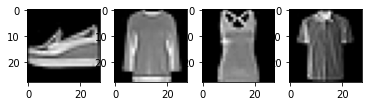

In [42]:
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(features.cpu()[i][0], cmap='gray')

plt.show()

In [44]:
for i in range(4):
  print(f"i = {i}, true_label = {classes[targets[i].item()]}")

i = 0, true_label = Ankle boot
i = 1, true_label = Pullover
i = 2, true_label = T-shirt/top
i = 3, true_label = Shirt


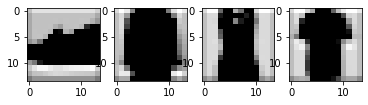

In [46]:
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(first_layer_activation(features).cpu().detach()[i][0], cmap='gray')
plt.show()

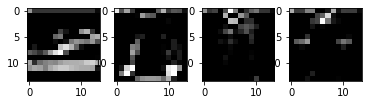

In [47]:
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(first_layer_activation(features).cpu().detach()[i][1], cmap='gray')
plt.show()

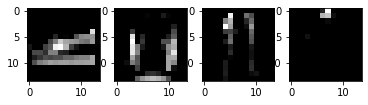

In [53]:
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(first_layer_activation(features).cpu().detach()[i][5], cmap='gray')
plt.show()

In [55]:
second_layer_activation = model.net[0:6]
second_layer_activation

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)

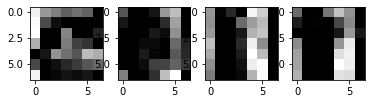

In [67]:
for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(second_layer_activation(features).cpu().detach()[i][11], cmap='gray')
plt.show()